18:54:09 - cmdstanpy - INFO - Chain [1] start processing
18:54:10 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2021-08-06  450.516118  530.994673  655.368362   450.516118   450.516118   
1   2021-08-09  454.038956  549.341550  666.480729   454.038956   454.038956   
2   2021-08-10  455.213235  540.952951  660.132410   455.213235   455.213235   
3   2021-08-11  456.387514  537.131292  659.212978   456.387514   456.387514   
4   2021-08-12  457.561793  527.652062  649.755109   457.561793   457.561793   
..         ...         ...         ...         ...          ...          ...   
247 2022-07-25  481.802720  497.078119  713.068308   385.118154   574.138190   
248 2022-07-26  480.194648  501.605440  718.977776   372.884859   580.943855   
249 2022-07-27  478.586576  487.512148  739.261329   360.439920   588.628761   
250 2022-07-28  476.978504  481.526040  742.073010   347.040663   597.287226   
251 2022-07-29  475.370432  475.227751  759.761388   336.134091   603.557898   

     additive_terms  additive_terms_low

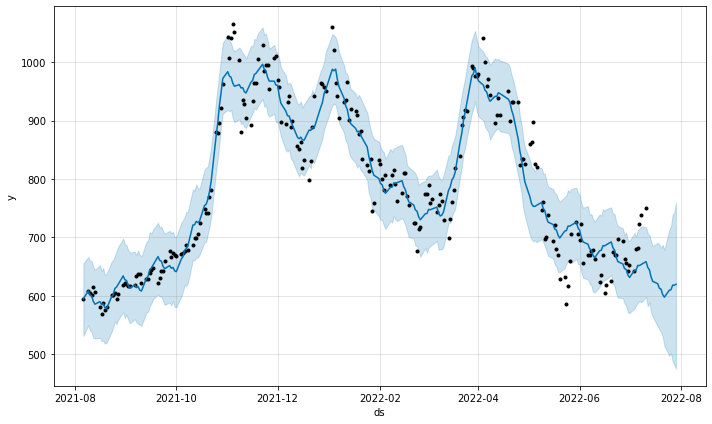

In [11]:
from prophet import Prophet
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

data = pd.read_csv('data.csv')


m = Prophet(growth="linear", changepoint_prior_scale=1, changepoint_range=0.8, holidays_prior_scale=0.01, seasonality_prior_scale=10.0, interval_width=0.9, daily_seasonality=True).add_seasonality(name='monthly', period=21, fourier_order=3).fit(data)
future = m.make_future_dataframe(periods=20)

# Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

forecast = m.predict(future)
print(forecast)
fig = m.plot(forecast)




In [7]:
#df = forecast["yhat", "ds"]
df = (forecast.loc[:, ["yhat", "ds"]]).iloc[-1:]
print(df)

          yhat         ds
251  706.61026 2022-07-29


In [8]:
yhat_future = df["yhat"]
print(yhat_future)

251    706.61026
Name: yhat, dtype: float64


In [9]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='180 days', period='45 days', horizon = '90 days')
df_cv.tail()


  0%|                                                     | 0/2 [00:00<?, ?it/s]18:53:56 - cmdstanpy - INFO - Chain [1] start processing
18:53:56 - cmdstanpy - INFO - Chain [1] done processing
 50%|██████████████████████▌                      | 1/2 [00:00<00:00,  1.23it/s]18:53:56 - cmdstanpy - INFO - Chain [1] start processing
18:53:57 - cmdstanpy - INFO - Chain [1] done processing
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.19it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
120,2022-07-05,1661.853414,-151.310331,3462.073721,680,2022-04-12
121,2022-07-06,1683.317286,-176.376618,3519.989645,682,2022-04-12
122,2022-07-07,1691.947742,-200.053495,3573.473380,722,2022-04-12
123,2022-07-08,1701.279259,-217.470013,3606.027067,739,2022-04-12
124,2022-07-11,1737.525211,-310.656771,3726.398540,750,2022-04-12


In [10]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,14426.256402,120.109352,108.954886,0.126880,0.102209,0.123133,0.166667
1,11 days,14142.028963,118.920263,108.022695,0.126788,0.102209,0.123962,0.250000
2,12 days,13916.306811,117.967397,107.397127,0.127256,0.114822,0.125427,0.333333
3,13 days,16112.142603,126.933615,115.637843,0.135255,0.124087,0.131520,0.416667
4,14 days,22934.132005,151.440193,134.921793,0.158119,0.140615,0.149639,0.416667
